In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

##### Load Dataset

In [2]:
df = pd.read_csv("C:/Infosys Internship/Datasets/Finalized Dataset/diabetes_prediction_dataset.csv")

In [3]:
print("Explicit NaN counts (per column):\n",df.isna().sum())

Explicit NaN counts (per column):
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [4]:
zero_invalid_cols = ["Glucose", "BloodPressure", "BMI", "Insulin"]  # Adjust if different in your data

for col in zero_invalid_cols:
    if col in df.columns:
        zero_count = (df[col] == 0).sum()
        print(f"Column '{col}' has {zero_count} entries with 0 (potential missing placeholders).")

In [5]:
ohe=OneHotEncoder(sparse_output=False).set_output(transform='pandas')

In [6]:
df_encoded=ohe.fit_transform(df[['gender','smoking_history']])

In [7]:
df=pd.concat([df,df_encoded],axis=1).drop(columns=['gender','smoking_history'])

In [8]:
scaling_column=[
    'age',
    'bmi',
    'HbA1c_level',
    'blood_glucose_level'
]

In [9]:
scaler=StandardScaler()

In [10]:
df[scaling_column]=scaler.fit_transform(df[scaling_column])

In [11]:
x=df.drop(columns=['diabetes'])
y=df['diabetes']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,
                                              stratify=y)

In [13]:
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)

Training set size: (80000, 15) (80000,)
Test set size: (20000, 15) (20000,)


In [14]:
base_model=LogisticRegression(random_state=42,class_weight='balanced')
base_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [15]:
y_pred=base_model.predict(X_test)

Accuracy: 0.88885

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94     18300
           1       0.43      0.89      0.58      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.76     20000
weighted avg       0.94      0.89      0.91     20000



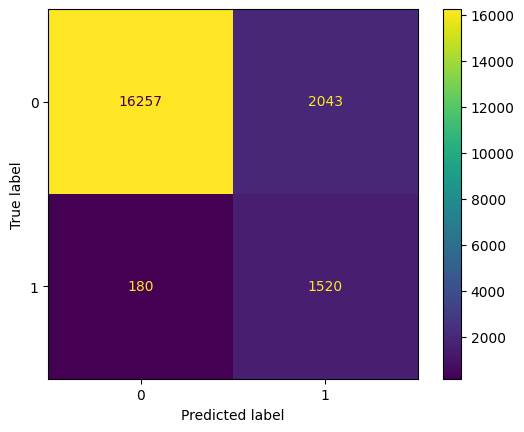

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

##### Hard Thresholding 

In [22]:
y_probs = model.predict_proba(X_test)[:, 1] 
# We only take [:, 1] because we are interested in the probability of being diabetic (class 1).

In [23]:
threshold = 0.3  # Adjust based on results
y_pred_adjusted = (y_probs >= threshold).astype(int)
# Normally, models classify as 1 (diabetic) if probability ≥ 0.5 (default threshold).
# We lower the threshold to 0.3 → meaning if a sample has even a 30% probability of being diabetic, we predict 1 (diabetic).
# This helps us catch more diabetic patients, and helps reducing false negatives!

In [24]:
print("Adjusted Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
print("\nClassification Report:\n", classification_report(y_test, y_pred_adjusted))

Adjusted Model Performance:
Accuracy: 0.8169

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.80      0.89     18300
           1       0.31      0.95      0.47      1700

    accuracy                           0.82     20000
   macro avg       0.65      0.88      0.68     20000
weighted avg       0.94      0.82      0.85     20000



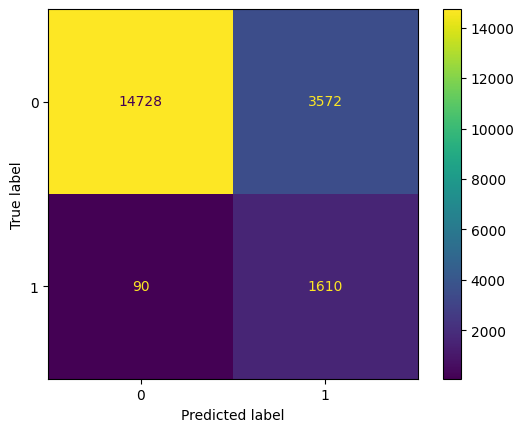

In [25]:
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
disp_adjusted = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted)
disp_adjusted.plot()
plt.show()